# Importing Needed Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

# Reading CSV file as weather_df and making date_time column as index of dataframe

In [69]:
weather_df = pd.read_csv('kanpur.csv', parse_dates=['date_time'], index_col='date_time')
weather_df.head(5)

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,05:28 PM,2,11,12,11,21,17,50,0.0,1015,11,10,320,10
2009-01-01 01:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,05:28 PM,3,12,13,12,22,11,52,0.0,1015,11,10,315,11
2009-01-01 02:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,05:28 PM,4,12,13,12,23,6,55,0.0,1015,11,10,310,11
2009-01-01 03:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,05:28 PM,5,12,13,12,23,0,57,0.0,1015,10,10,304,12
2009-01-01 04:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,05:28 PM,5,14,14,14,19,0,54,0.0,1016,11,10,302,11


# Checking columns in our dataframe

In [70]:
weather_df.columns

Index(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

## Now shape

In [71]:
weather_df.shape

(96432, 24)

In [72]:
weather_df.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,96432.000000,96432.000000,96432.0,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.00000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000
mean,33.400199,22.374564,0.0,11.037805,6.877053,4.465012,46.094077,13.230629,30.735783,30.86884,29.088384,14.211766,16.993550,44.370479,0.037756,1006.217946,27.429577,9.885214,205.537270,9.734092
std,6.994211,7.635253,0.0,2.152973,1.551294,3.414374,31.249725,8.053778,9.320398,9.17754,8.051981,6.926605,23.150025,22.484991,0.307143,7.593850,8.459575,1.058515,104.369548,4.835331
min,15.000000,3.000000,0.0,4.000000,3.000000,1.000000,0.000000,-14.000000,4.000000,7.00000,4.000000,0.000000,0.000000,2.000000,0.000000,986.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,16.000000,0.0,8.700000,6.000000,1.000000,18.000000,7.000000,24.000000,25.00000,24.000000,9.000000,0.000000,26.000000,0.000000,1000.000000,21.000000,10.000000,101.000000,6.000000
50%,34.000000,24.000000,0.0,11.600000,7.000000,5.000000,46.000000,12.000000,31.000000,31.00000,29.000000,14.000000,5.000000,42.000000,0.000000,1006.000000,28.000000,10.000000,240.000000,9.000000
75%,38.000000,28.000000,0.0,13.000000,8.000000,8.000000,73.000000,21.000000,38.000000,38.00000,35.000000,18.000000,27.000000,61.000000,0.000000,1013.000000,33.000000,10.000000,299.000000,12.000000
max,51.000000,39.000000,0.0,13.900000,11.000000,11.000000,100.000000,31.000000,65.000000,65.00000,54.000000,75.000000,100.000000,100.000000,20.600000,1024.000000,50.000000,20.000000,360.000000,47.000000


# Checking is there any null values in dataset

In [73]:
weather_df.isnull().any()

maxtempC             False
mintempC             False
totalSnow_cm         False
sunHour              False
uvIndex              False
uvIndex.1            False
moon_illumination    False
moonrise             False
moonset              False
sunrise              False
sunset               False
DewPointC            False
FeelsLikeC           False
HeatIndexC           False
WindChillC           False
WindGustKmph         False
cloudcover           False
humidity             False
precipMM             False
pressure             False
tempC                False
visibility           False
winddirDegree        False
windspeedKmph        False
dtype: bool

### Now lets separate the feature (i.e. temperature) to be predicted from the rest of the featured. weather_x stores the rest of the dataset while weather_y has temperature column.

In [74]:
weather_df_num=weather_df.loc[:,['maxtempC','mintempC','cloudcover','humidity','tempC', 'sunHour', 'precipMM', 'pressure','windspeedKmph']]
weather_df_num.head()

,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,precipMM,pressure,windspeedKmph
date_time,,,,,,,,,
2009-01-01 00:00:00,24,10,17,50,11,8.7,0.0,1015,10
2009-01-01 01:00:00,24,10,11,52,11,8.7,0.0,1015,11
2009-01-01 02:00:00,24,10,6,55,11,8.7,0.0,1015,11
2009-01-01 03:00:00,24,10,0,57,10,8.7,0.0,1015,12
2009-01-01 04:00:00,24,10,0,54,11,8.7,0.0,1016,11


# Shape of new dataframe

In [76]:
weather_df_num.shape

(96432, 9)

# Columns in new dataframe

In [77]:
weather_df_num.columns

Index(['maxtempC', 'mintempC', 'cloudcover', 'humidity', 'tempC', 'sunHour',
       'precipMM', 'pressure', 'windspeedKmph'],
      dtype='object')

## Ploting all the column values

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff246b38790>,
      dtype=object)

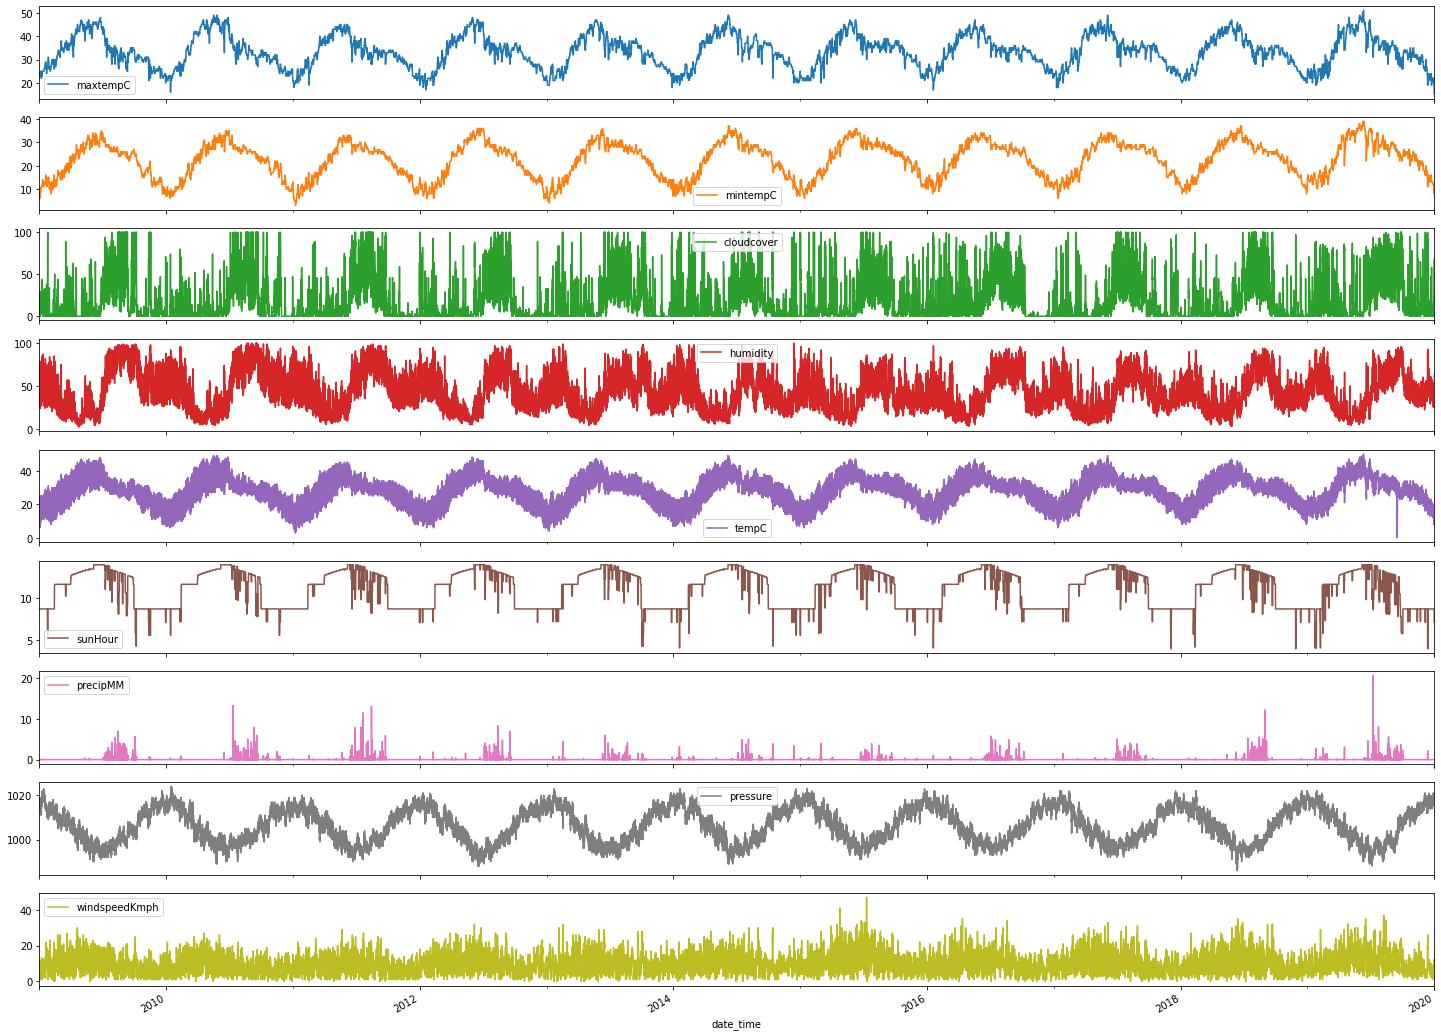

In [78]:
weather_df_num.plot(subplots=True, figsize=(25,20))

# Ploting all the column values for 1 year

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff23facb5d0>,
      dtype=object)

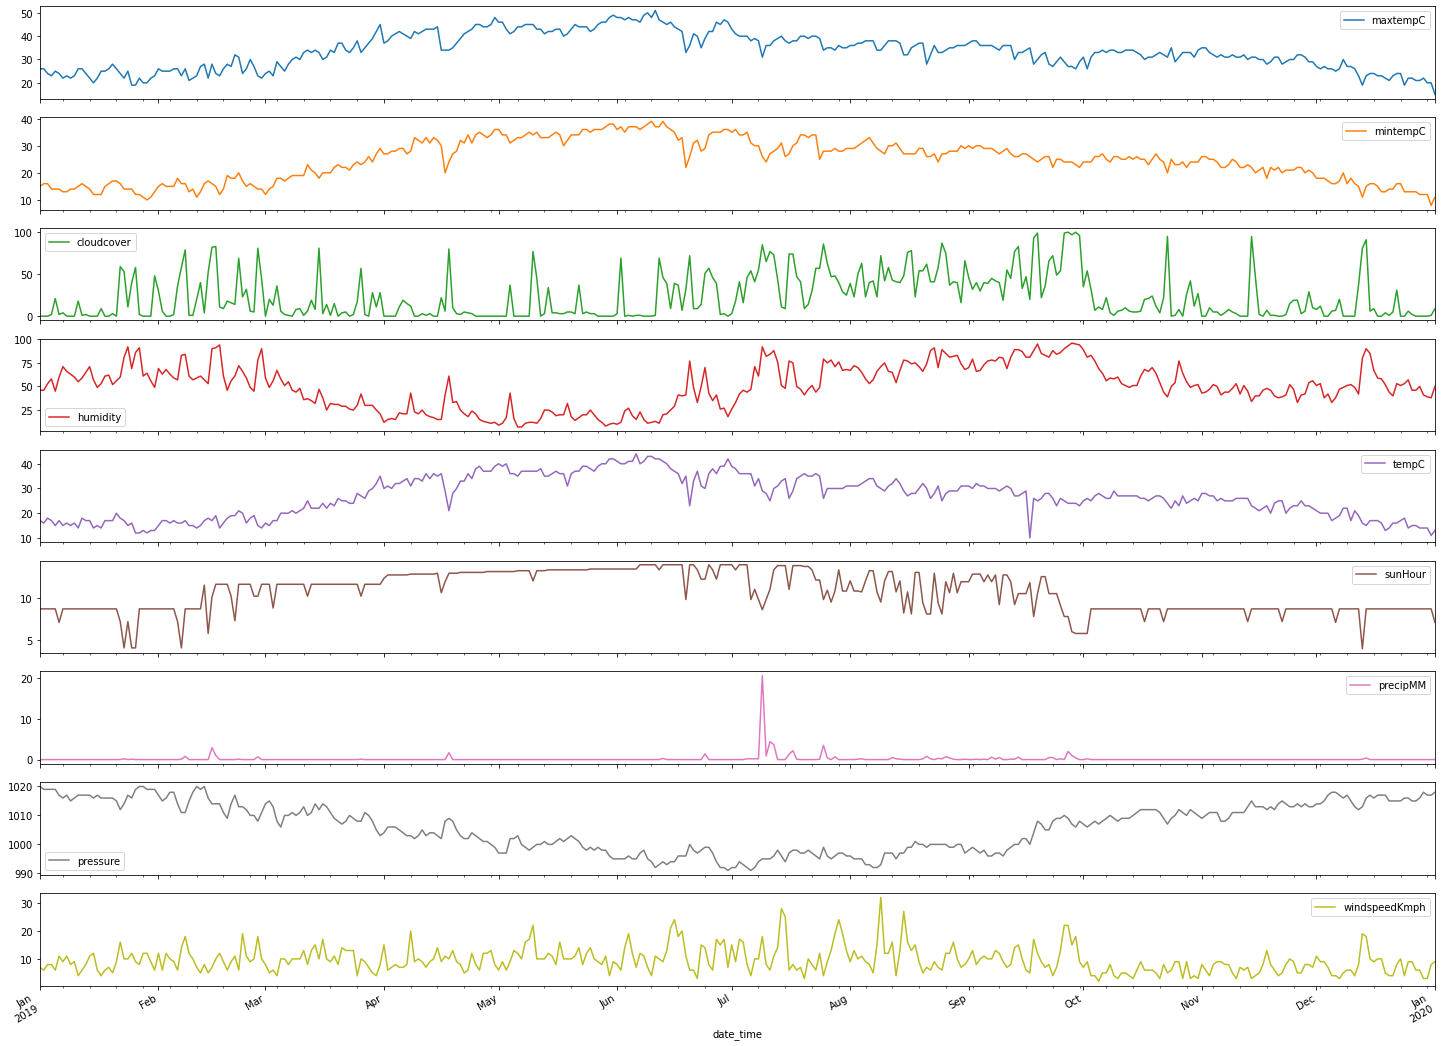

In [79]:
weather_df_num['2019':'2020'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(25,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff23f22e590>,
      dtype=object)

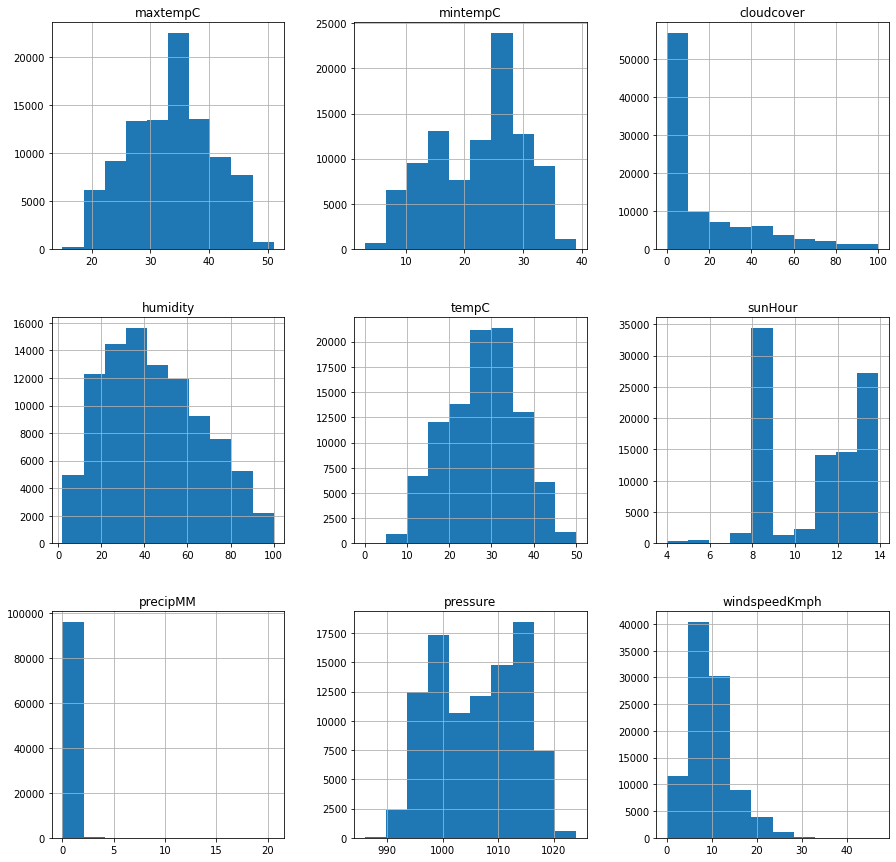

In [80]:
weather_df_num.hist(bins=10,figsize=(15,15))

In [81]:
weth=weather_df_num['2019':'2020']
weth.head()

,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,precipMM,pressure,windspeedKmph
date_time,,,,,,,,,
2019-01-01 00:00:00,26,15,0,46,17,8.7,0.0,1020,7
2019-01-01 01:00:00,26,15,0,46,17,8.7,0.0,1019,7
2019-01-01 02:00:00,26,15,0,47,16,8.7,0.0,1019,7
2019-01-01 03:00:00,26,15,0,48,16,8.7,0.0,1019,6
2019-01-01 04:00:00,26,15,0,48,16,8.7,0.0,1019,6


In [82]:
weather_y=weather_df_num.pop("tempC")
weather_x=weather_df_num

### Now our dataset is prepared and it is ready to be fed to the model for training.it’s time to split the dataset into training and testing.

In [83]:
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)

In [84]:
train_X.shape

(77145, 8)

In [85]:
train_y.shape

(77145,)

### train_x has all the features except temperature and train_y has the corresponding temperature for those features. in supervised machine learning we first feed the model with input and associated output and then we check with a new input.

In [86]:
train_y.head()

date_time
2012-03-13 07:00:00    22
2009-11-05 21:00:00    21
2017-10-11 22:00:00    30
2019-06-08 11:00:00    47
2019-03-06 05:00:00    18
Name: tempC, dtype: int64

# Multiple Linear Regression

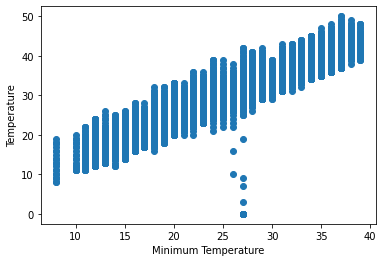

In [87]:
plt.scatter(weth.mintempC, weth.tempC)
plt.xlabel("Minimum Temperature")
plt.ylabel("Temperature")
plt.show()

In [88]:
model=LinearRegression()
model.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
prediction = model.predict(test_X)

In [90]:
#calculating error
np.mean(np.absolute(prediction-test_y))

2.5083342890211706

In [91]:
pd.DataFrame({'Actual':test_y,'Prediction':prediction,'diff':(test_y-prediction)})

,Actual,Prediction,diff
date_time,,,
2013-07-10 08:00:00,34,33.209030,0.790970
2015-11-04 20:00:00,25,25.275755,-0.275755
2015-09-21 09:00:00,34,31.975338,2.024662
2017-02-16 11:00:00,28,20.496727,7.503273
2012-07-21 01:00:00,28,28.401085,-0.401085
...,...,...,...
2019-03-30 09:00:00,37,33.187428,3.812572
2015-11-12 12:00:00,32,28.483724,3.516276
2019-12-31 05:00:00,8,15.177361,-7.177361


# Decision Tree Regression

In [92]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(train_X,train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [93]:
prediction2=regressor.predict(test_X)
np.mean(np.absolute(prediction2-test_y))

1.6575145607576778

In [94]:
pd.DataFrame({'Actual':test_y,'Prediction':prediction2,'diff':(test_y-prediction2)})

,Actual,Prediction,diff
date_time,,,
2013-07-10 08:00:00,34,34.0,0.0
2015-11-04 20:00:00,25,25.0,0.0
2015-09-21 09:00:00,34,34.0,0.0
2017-02-16 11:00:00,28,28.0,0.0
2012-07-21 01:00:00,28,28.0,0.0
...,...,...,...
2019-03-30 09:00:00,37,39.0,-2.0
2015-11-12 12:00:00,32,32.0,0.0
2019-12-31 05:00:00,8,9.0,-1.0


# Random Forest Regression

In [95]:
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(train_X,train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=90, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [96]:
prediction3=regr.predict(test_X)
np.mean(np.absolute(prediction3-test_y))

1.297267400960861

In [97]:
pd.DataFrame({'Actual':test_y,'Prediction':prediction3,'diff':(test_y-prediction3)})

,Actual,Prediction,diff
date_time,,,
2013-07-10 08:00:00,34,33.94,0.06
2015-11-04 20:00:00,25,24.43,0.57
2015-09-21 09:00:00,34,34.36,-0.36
2017-02-16 11:00:00,28,26.35,1.65
2012-07-21 01:00:00,28,28.17,-0.17
...,...,...,...
2019-03-30 09:00:00,37,32.99,4.01
2015-11-12 12:00:00,32,31.74,0.26
2019-12-31 05:00:00,8,10.62,-2.62


In [98]:
from sklearn.metrics import r2_score

# Calculating R2-score for Multiple Linear Regression

In [99]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction ) )

Mean absolute error: 2.51
Residual sum of squares (MSE): 10.00
R2-score: 0.86


# Calculating R2-score for Decision Tree Regression

In [100]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction2 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction2 ) )

Mean absolute error: 1.66
Residual sum of squares (MSE): 7.22
R2-score: 0.90


# Calculating R2-score for Random Forest Regression

In [101]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction3 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction3 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction3 ) )

Mean absolute error: 1.30
Residual sum of squares (MSE): 3.51
R2-score: 0.95
